In [2]:
#!/usr/bin/python

import matplotlib.pyplot as plt
from prep_terrain_data import makeTerrainData
from class_vis import prettyPicture
from time import time 
features_train, labels_train, features_test, labels_test = makeTerrainData()

# print(features_train[i], labels_train[i])

import pandas as pd
import numpy as np


df = pd.DataFrame(features_train)
dfl = pd.DataFrame(labels_train)
df = pd.concat([df,dfl], axis=1)
df.head(100)

,0,1,0
0,0.639427,0.099355,0.0
1,0.025011,0.685680,0.0
2,0.275029,0.544466,0.0
3,0.223211,0.977843,1.0
4,0.736471,0.358674,1.0
5,0.676699,0.398140,1.0
6,0.892180,0.189809,1.0
7,0.086939,0.122160,0.0
8,0.421922,0.848033,1.0
9,0.029797,0.454717,0.0


In [116]:
import warnings
warnings.filterwarnings('ignore')

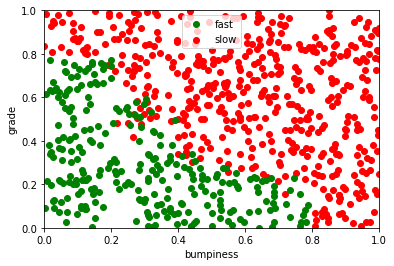

In [10]:
### the training data (features_train, labels_train) have both "fast" and "slow"
### points mixed together--separate them so we can give them different colors
### in the scatterplot and identify them visually
grade_fast = [features_train[ii][0] for ii in range(0, len(features_train)) if labels_train[ii]==0]
bumpy_fast = [features_train[ii][1] for ii in range(0, len(features_train)) if labels_train[ii]==0]
grade_slow = [features_train[ii][0] for ii in range(0, len(features_train)) if labels_train[ii]==1]
bumpy_slow = [features_train[ii][1] for ii in range(0, len(features_train)) if labels_train[ii]==1]


#### initial visualization
plt.xlim(0.0, 1.0)
plt.ylim(0.0, 1.0)
plt.plot(bumpy_fast, grade_fast,"go" ,label="fast")
plt.scatter(grade_slow, bumpy_slow, color = "r", label="slow")
plt.legend()
plt.xlabel("bumpiness")
plt.ylabel("grade")
plt.show()
#########################################################################


In [44]:
### your code here!  name your classifier object clf if you want the 
### visualization code (prettyPicture) to show you the decision boundary
t = time()
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=5, p =1)
model.fit(features_train, labels_train)
acc = model.score(features_test, labels_test)
print(time() - t, acc)


0.004381895065307617 0.928


In [68]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import VotingClassifier
from sklearn.naive_bayes import GaussianNB

lr = LogisticRegression()
svc = SVC(kernel = 'rbf', gamma=140, probability=True)
rf = RandomForestClassifier(n_estimators=100 )

t = time()
model = VotingClassifier(estimators=[('lr',lr), ('svc', svc), ('rf', rf)])
model.fit(features_train, labels_train)
acc = model.score(features_test, labels_test )

print(time() - t, acc)



0.25626587867736816 0.936


/Users/muhammadhamzajaved/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:171: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [138]:
from sklearn.metrics import accuracy_score

for clf in (lr, svc, rf, model):
    clf.fit(features_train, labels_train)
    pred = clf.predict(features_test)
    
    print(clf.__class__.__name__,    accuracy_score(labels_test, pred))



LogisticRegression 0.916
SVC 0.94
RandomForestClassifier 0.912
VotingClassifier 0.936


In [140]:
from sklearn.cross_validation import KFold

features_train = np.array(features_train)
labels_train = np.array(labels_train)
acc = []
k = KFold(len(features_train), 10, shuffle=True)
for train, test in k:
    model.fit(features_train[train], labels_train[train])
    a = model.score(features_train[test], labels_train[test])
    acc.append(a)
    print(a)

np.mean(acc)

0.9466666666666667
0.9733333333333334
0.9733333333333334
0.92
0.9466666666666667
0.96
0.9733333333333334
0.96
0.9733333333333334
0.9466666666666667


0.9573333333333334

In [137]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

t = time()
clf = DecisionTreeClassifier()

bagging = BaggingClassifier(n_jobs=1, verbose=0, max_samples=10, bootstrap=True, base_estimator=clf, n_estimators=1000,oob_score=True)    
bagging.fit(features_train, labels_train)
acc = bagging.score(features_test, labels_test)
print(time() - t, acc, bagging.oob_score_)


1.348912239074707 0.924 0.92


In [113]:
try:
    prettyPicture(clf, features_test, labels_test)
except NameError:
    pass

/Users/muhammadhamzajaved/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:171: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
